
--- Matriz de Confusión (LDA) ---
[[68574  1261]
 [ 1440   327]]

--- Reporte de Clasificación (LDA) ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     69835
           1       0.21      0.19      0.19      1767

    accuracy                           0.96     71602
   macro avg       0.59      0.58      0.59     71602
weighted avg       0.96      0.96      0.96     71602


--- ROC AUC (LDA) ---
AUC: 0.9141


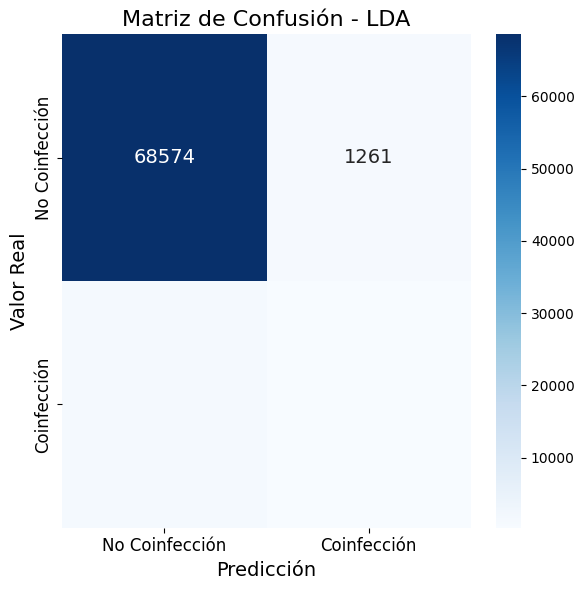

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar y preparar datos
df = pd.read_csv('data.csv', sep=';', decimal='.')
df = df.drop(columns=['n'])
X = df.drop(columns=['target'])
y = df['target']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Entrenar modelo LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predicciones
y_pred = lda.predict(X_test)
y_proba = lda.predict_proba(X_test)[:, 1]

# Evaluación
print("\n--- Matriz de Confusión (LDA) ---")
print(confusion_matrix(y_test, y_pred))
print("\n--- Reporte de Clasificación (LDA) ---")
print(classification_report(y_test, y_pred))
print("\n--- ROC AUC (LDA) ---")
print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")

# Calcular matriz
cm = confusion_matrix(y_test, y_pred)
labels = ['No Coinfección', 'Coinfección']

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels, cbar=True,
            annot_kws={'size': 14})

plt.title('Matriz de Confusión - LDA', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Valor Real', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()
